In [1]:
import numpy as np
from jaqs.data import DataView
from jaqs.research import SignalDigger
import warnings

warnings.filterwarnings("ignore")
dataview_folder = 'JAQS_Data/hs300'
dv = DataView()
dv.load_dataview(dataview_folder)

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Dataview loaded successfully.


In [2]:
mask = dv.get_ts('mask_index_member')
can_enter = dv.get_ts('can_enter')
can_exit = dv.get_ts('can_exit')

In [3]:
dv.remove_field('above')
dv.remove_field('delay_above')
dv.remove_field('sig_cross')

Field name [above] does not exist.
Field name [delay_above] does not exist.
Field name [sig_cross] does not exist.


In [4]:
def add_event():
    dv.add_formula('above', ' Ts_Mean(close_adj, 4) >= Ts_Mean(close_adj, 16)', is_quarterly=False)
    dv.add_formula('delay_above', 'Delay(above, 1)', is_quarterly=False)
    dv.add_formula('sig_cross', 'above&&(!delay_above)', is_quarterly=False)
add_event()

In [5]:
import matplotlib.pyplot as plt

def cal_obj(signal, name, period):
    price = dv.get_ts('close_adj').loc[20160105:]
    price_bench = dv.data_benchmark.loc[20160105:]

    # Step.4 analyze!
    obj = SignalDigger(output_folder="zz500/%s" % name,
                       output_format='pdf')
    
    df_all, df_events, df_stats = obj.create_binary_event_report(signal.loc[20160105:], 
                                       price, 
                                       mask.loc[20160105:], 
                                       can_enter.loc[20160105:], 
                                       can_exit.loc[20160105:], 
                                       None,
                                       #price_bench, 
                                       periods=[period, period*2, period*3])
    res = obj.create_full_report()
    return obj
    
def plot_pfm(signal, name, period=5):
    obj = cal_obj(signal, name, period)
    obj.fig_objs
    plt.show()
    
def signal_data(signal, name, period=5):
    obj = cal_obj(signal, name, period)
    return obj.signal_data

In [6]:
signal = dv.get_ts('sig_cross')  # avoid look-ahead bias

Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%

       Calendar Distribution    (9300 occurance from 2016-01-05 to 2017-12-22):
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\zz500\cross_sig\event_report.pdf


Value of signals of Different Quantiles Statistics
          min  max     mean       std   count  count %
quantile                                              
1         0.0  1.0  0.03855  0.192521  136498    100.0
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\zz500\cross_sig\returns_report.pdf
Information Analysis
                ic
IC Mean     -0.002
IC Std.      0.071
t-stat(IC)     NaN
p-value(IC)    NaN
IC Skew        NaN
IC Kurtosis    NaN
Ann. IR     -0.025
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\zz500\cros

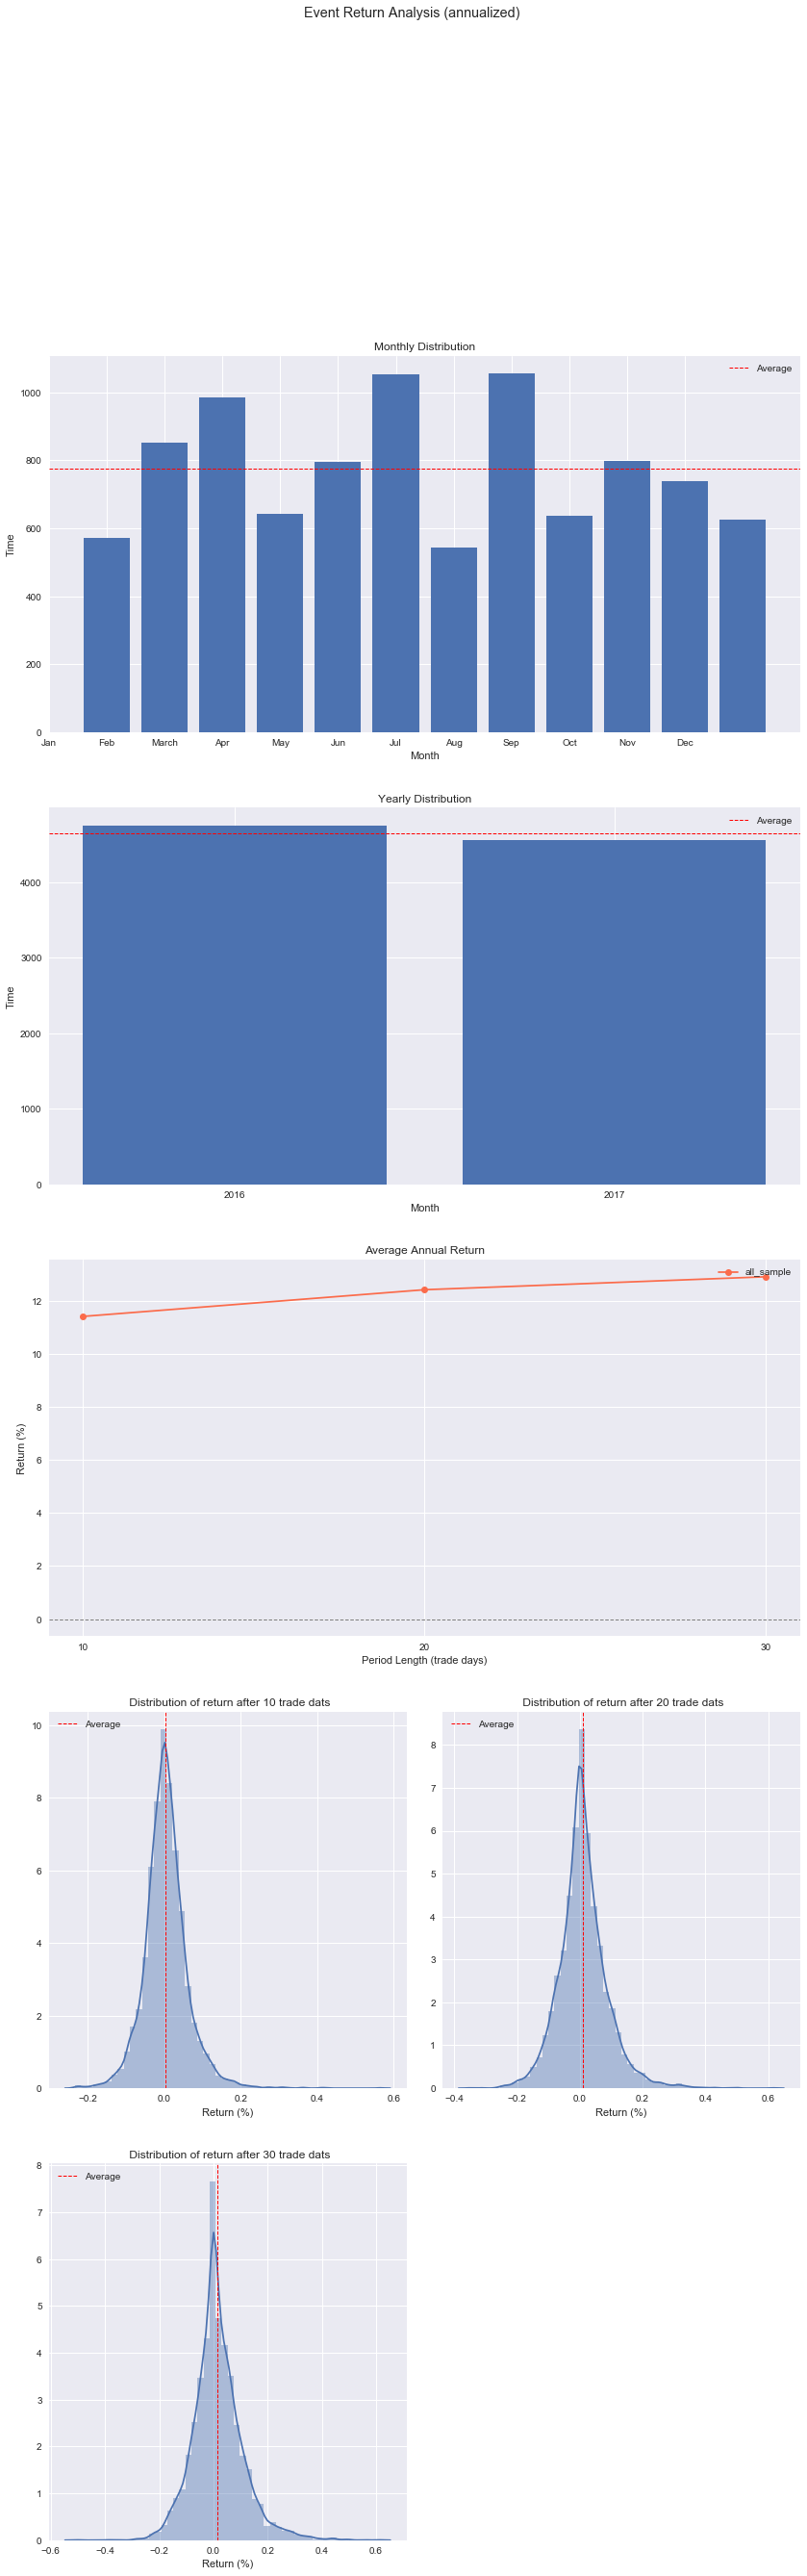

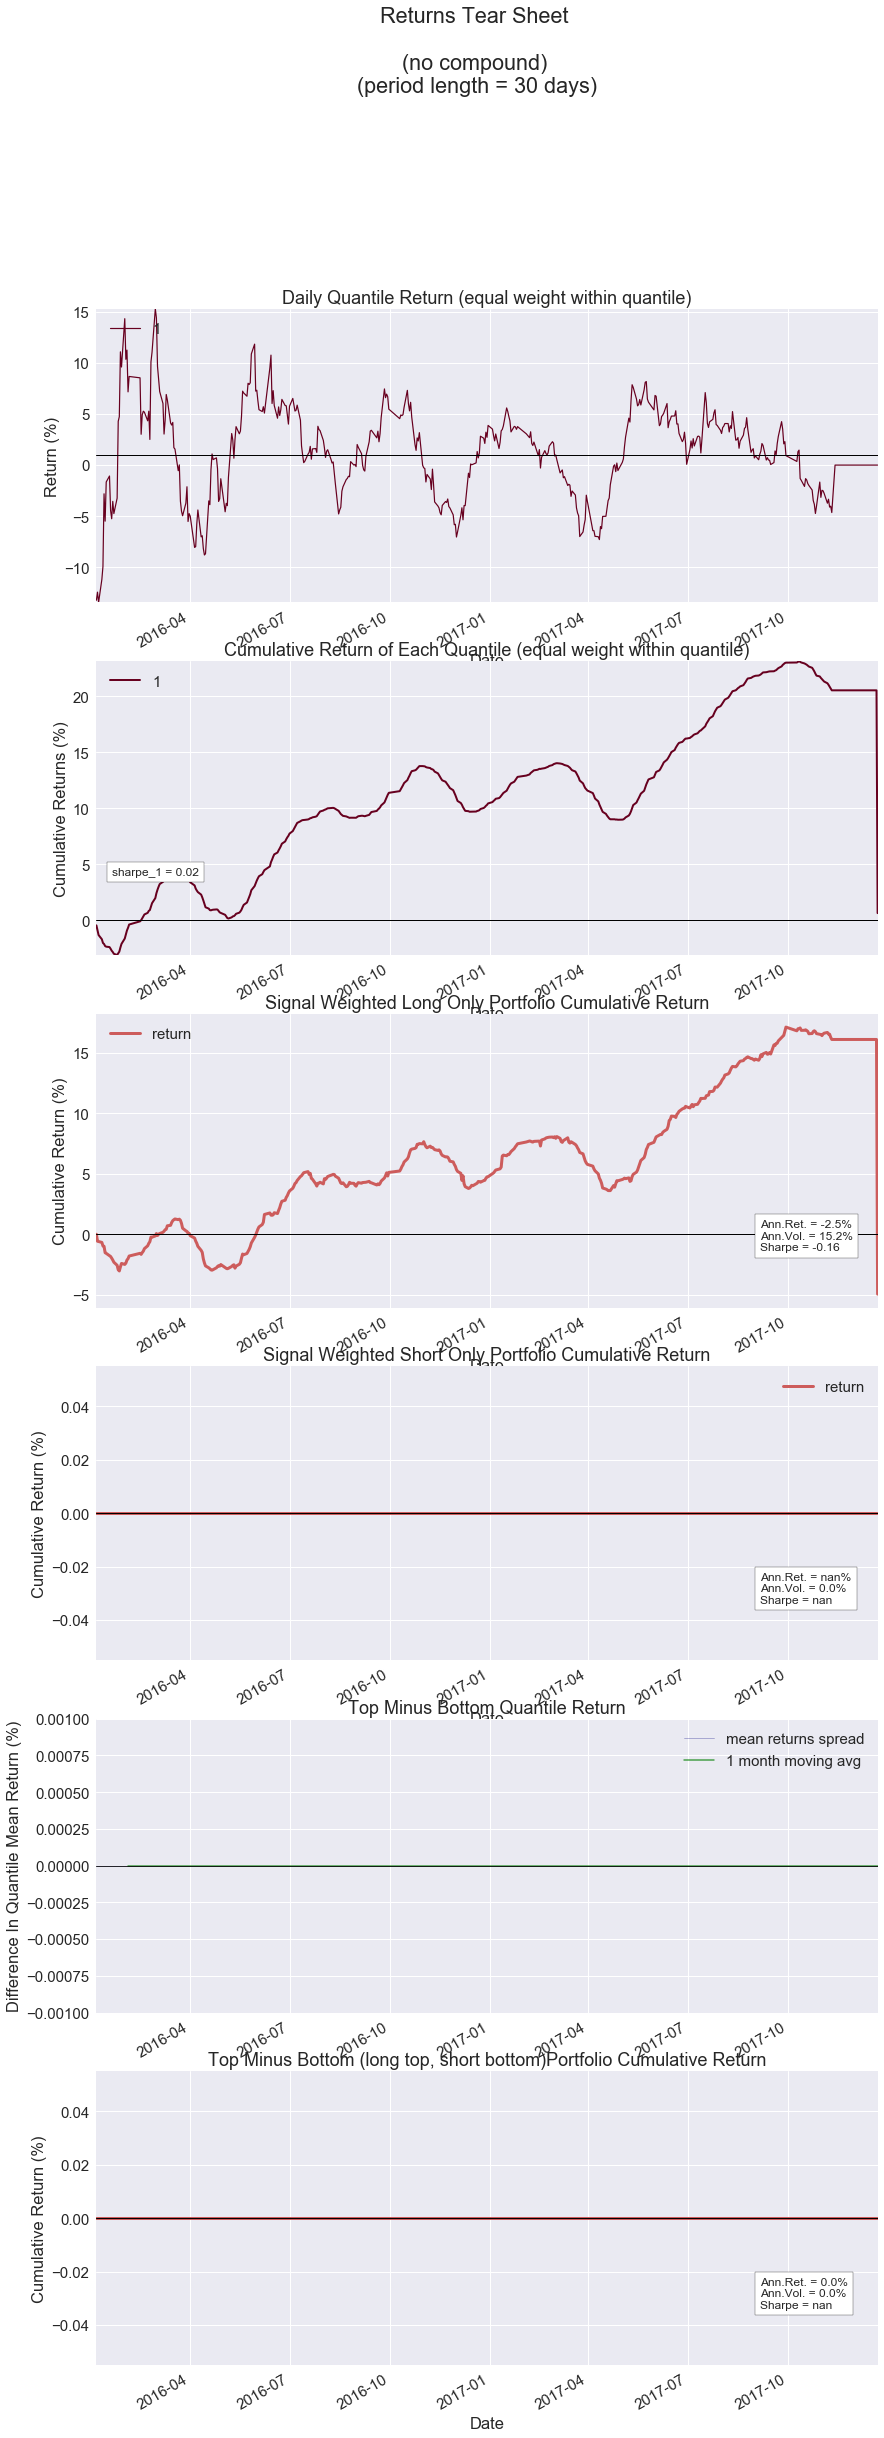

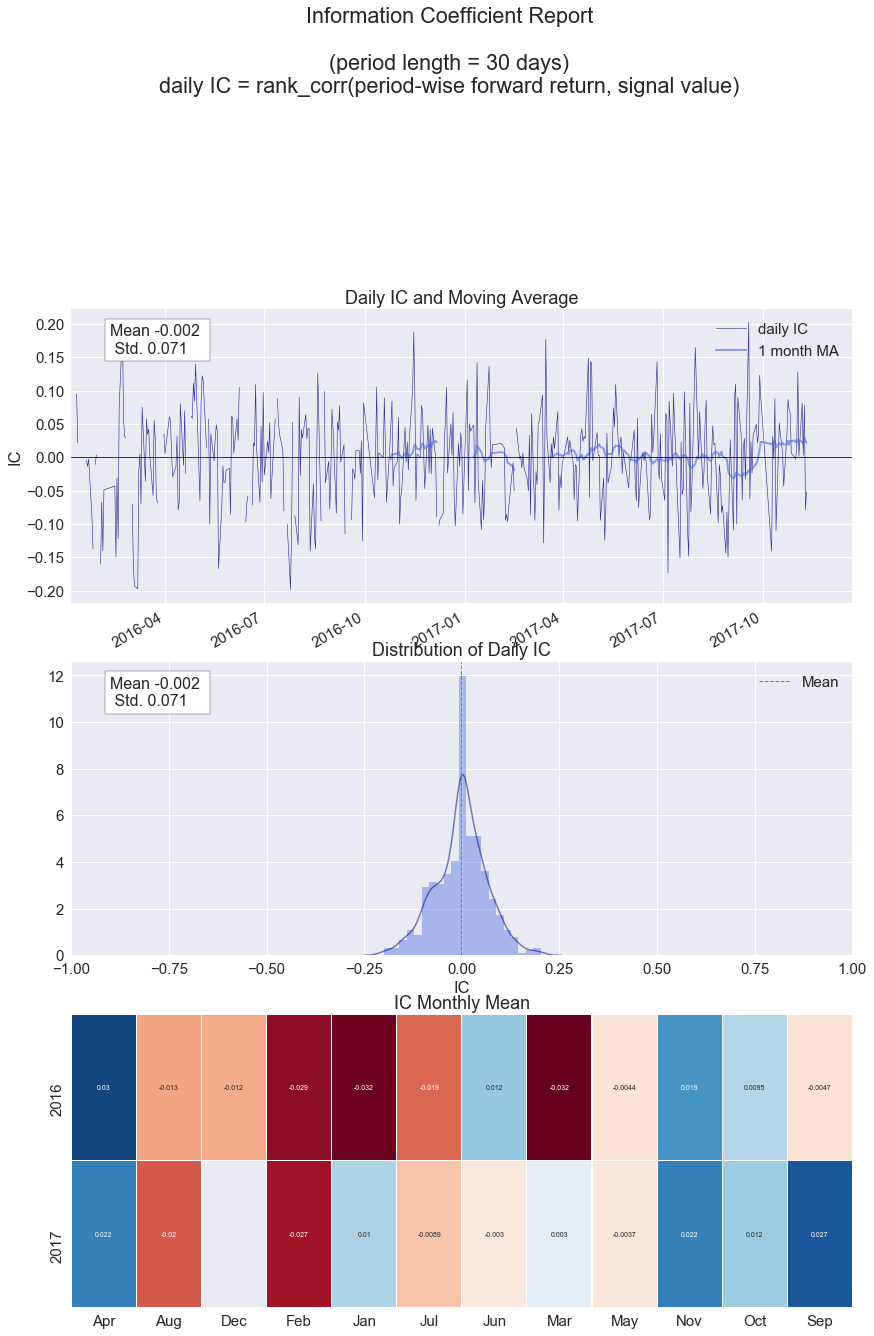

In [7]:
plot_pfm(signal,'cross_sig', period=10)

In [8]:
signal_data = signal_data(signal,'accross',period=10) 

Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%

       Calendar Distribution    (9300 occurance from 2016-01-05 to 2017-12-22):
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\zz500\accross\event_report.pdf


Value of signals of Different Quantiles Statistics
          min  max     mean       std   count  count %
quantile                                              
1         0.0  1.0  0.03855  0.192521  136498    100.0
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\zz500\accross\returns_report.pdf
Information Analysis
                ic
IC Mean     -0.002
IC Std.      0.071
t-stat(IC)     NaN
p-value(IC)    NaN
IC Skew        NaN
IC Kurtosis    NaN
Ann. IR     -0.025
Figure saved: C:\Users\small\OneDrive\notebook\Internet_Course\Selection\JAQS\zz500\accross\

In [9]:
signal_df = signal_data.signal[signal_data.signal==1].unstack()

In [10]:
signal_df

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,000061.SZ,000063.SZ,...,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603799.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20160107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import pandas as pd

weight_list = []
for time_index, weight in signal_df.iterrows():
    temp = weight.copy()
    temp[~np.isnan(temp)] = 1
    weight_result = (temp / len(temp.dropna()))
    weight_list.append(weight_result.to_dict())
stock_df = pd.DataFrame(weight_list, index=signal_df.index)

In [12]:
stock_df

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,000061.SZ,000063.SZ,...,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603799.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20160107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import pandas as pd
import numpy as np

def read():
    return pd.read_excel(PATH)


def iter_slice(length, gap=10):
    for i in range(gap):
        yield slice(i, length, gap)


def iter_daily(frame, gap=10):
    for sl in iter_slice(len(frame), gap):
        one = frame.iloc[sl].fillna(0)/gap
        yield one.reindex(frame.index).ffill().fillna(0)


def expand(code):
    if code.endswith(".SZ"):
        return code[:6] + ".XSHE"
    else:
        return code[:6] + ".XSHG"

from datetime import datetime

def convert_time(num):
    return datetime.strptime(str(num), "%Y%m%d").replace(hour=15)

def cal_target_old(signal, period=5):
    table = signal.rename_axis(convert_time).rename_axis(expand, 1).replace(0, np.NaN)
    target = sum(iter_daily(table, gap=period))
    return target

#简化了target的计算过程
def cal_target(signal, period=5):
    table = signal.rename_axis(convert_time).rename_axis(expand, 1).fillna(0)
    target_cumsum = (table / period).cumsum()
    target = target_cumsum - target_cumsum.shift(period-1).fillna(0)
    return target

In [14]:
target_old = cal_target_old(stock_df, period=10)
print(target_old)
target = cal_target(stock_df, period=10)
print(target)
print((target_old - target).abs().mean().describe())
# 计算过程检验，只有可以忽略的浮点舍入误差

                     000001.XSHE  000002.XSHE  000008.XSHE  000009.XSHE  \
trade_date                                                                
2016-01-07 15:00:00     0.000000         0.00     0.000000     0.000000   
2016-01-11 15:00:00     0.000000         0.00     0.000000     0.000000   
2016-01-12 15:00:00     0.000000         0.00     0.000000     0.000000   
2016-01-14 15:00:00     0.000000         0.00     0.000000     0.000000   
2016-01-18 15:00:00     0.000000         0.00     0.000000     0.000000   
2016-01-20 15:00:00     0.000000         0.00     0.000000     0.000000   
2016-01-21 15:00:00     0.000000         0.00     0.000000     0.000000   
2016-01-22 15:00:00     0.000000         0.00     0.000000     0.000000   
2016-01-25 15:00:00     0.000000         0.00     0.000000     0.000000   
2016-01-26 15:00:00     0.000000         0.00     0.000000     0.000000   
2016-01-28 15:00:00     0.000000         0.00     0.000000     0.000000   
2016-01-29 15:00:00     0

In [15]:
pool = target.replace(0,np.nan)
pool

,000001.XSHE,000002.XSHE,000008.XSHE,000009.XSHE,000027.XSHE,000039.XSHE,000046.XSHE,000060.XSHE,000061.XSHE,000063.XSHE,...,601997.XSHG,601998.XSHG,603000.XSHG,603160.XSHG,603288.XSHG,603799.XSHG,603833.XSHG,603858.XSHG,603885.XSHG,603993.XSHG
trade_date,,,,,,,,,,,,,,,,,,,,,
2016-01-07 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-12 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-14 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-18 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-20 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-21 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-22 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-25 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


         when using: `python -m better_exceptions'. Otherwise, only code
         loaded from files will be inspected!
[2018-01-06 10:08:43.923548] DEBUG: basic_system_log: 
{'base': {'accounts': {'STOCK': 10000000.0},
          'benchmark': '000300.XSHG',
          'data_bundle_path': 'C:\\Users\\small/.rqalpha\\bundle',
          'end_date': datetime.date(2017, 12, 22),
          'frequency': '1d',
          'init_positions': [],
          'margin_multiplier': 1,
          'persist': False,
          'persist_mode': PERSIST_MODE.REAL_TIME,
          'resume_mode': False,
          'run_type': RUN_TYPE.BACKTEST,
          'source_code': None,
          'start_date': datetime.date(2016, 1, 10),
          'strategy_file': 'strategy.py'},
 'extra': {'context_vars': None,
           'dividend_reinvestment': False,
           'enable_profiler': False,
           'force_run_init_when_pt_resume': False,
           'is_hold': False,
           'locale': 'zh_Hans_CN',
           'log_level': '

2016-03-29 WARN 000063.XSHE 在 2016-03-29 15:00:00 时停牌。
2016-03-29 WARN 000651.XSHE 在 2016-03-29 15:00:00 时停牌。
2016-03-29 WARN 002739.XSHE 在 2016-03-29 15:00:00 时停牌。
2016-03-31 WARN 601258.XSHG 在 2016-03-31 15:00:00 时停牌。
2016-03-31 WARN 000063.XSHE 在 2016-03-31 15:00:00 时停牌。
2016-03-31 WARN 000651.XSHE 在 2016-03-31 15:00:00 时停牌。
2016-03-31 WARN 002470.XSHE 在 2016-03-31 15:00:00 时停牌。
2016-03-31 WARN 002739.XSHE 在 2016-03-31 15:00:00 时停牌。
2016-04-01 WARN 601258.XSHG 在 2016-04-01 15:00:00 时停牌。
2016-04-01 WARN 000063.XSHE 在 2016-04-01 15:00:00 时停牌。
2016-04-01 WARN 000651.XSHE 在 2016-04-01 15:00:00 时停牌。
2016-04-01 WARN 002470.XSHE 在 2016-04-01 15:00:00 时停牌。
2016-04-01 WARN 002739.XSHE 在 2016-04-01 15:00:00 时停牌。
2016-04-05 WARN 601258.XSHG 在 2016-04-05 15:00:00 时停牌。
2016-04-05 WARN 000063.XSHE 在 2016-04-05 15:00:00 时停牌。
2016-04-05 WARN 000651.XSHE 在 2016-04-05 15:00:00 时停牌。
2016-04-05 WARN 000917.XSHE 在 2016-04-05 15:00:00 时停牌。
2016-04-05 WARN 002470.XSHE 在 2016-04-05 15:00:00 时停牌。
2016-04-05

2016-05-23 WARN 603993.XSHG 在 2016-05-23 15:00:00 时停牌。
2016-05-24 WARN 000651.XSHE 在 2016-05-24 15:00:00 时停牌。
2016-05-24 WARN 000917.XSHE 在 2016-05-24 15:00:00 时停牌。
2016-05-24 WARN 002739.XSHE 在 2016-05-24 15:00:00 时停牌。
2016-05-24 WARN 603993.XSHG 在 2016-05-24 15:00:00 时停牌。
2016-05-25 WARN 000651.XSHE 在 2016-05-25 15:00:00 时停牌。
2016-05-25 WARN 000917.XSHE 在 2016-05-25 15:00:00 时停牌。
2016-05-25 WARN 002739.XSHE 在 2016-05-25 15:00:00 时停牌。
2016-05-25 WARN 603993.XSHG 在 2016-05-25 15:00:00 时停牌。
2016-05-26 WARN 000651.XSHE 在 2016-05-26 15:00:00 时停牌。
2016-05-26 WARN 000917.XSHE 在 2016-05-26 15:00:00 时停牌。
2016-05-26 WARN 002739.XSHE 在 2016-05-26 15:00:00 时停牌。
2016-05-27 WARN 000651.XSHE 在 2016-05-27 15:00:00 时停牌。
2016-05-27 WARN 000917.XSHE 在 2016-05-27 15:00:00 时停牌。
2016-05-27 WARN 002739.XSHE 在 2016-05-27 15:00:00 时停牌。
2016-05-30 WARN 000651.XSHE 在 2016-05-30 15:00:00 时停牌。
2016-05-30 WARN 000917.XSHE 在 2016-05-30 15:00:00 时停牌。
2016-05-30 WARN 002739.XSHE 在 2016-05-30 15:00:00 时停牌。
2016-05-31

2016-08-16 WARN 002465.XSHE 在 2016-08-16 15:00:00 时停牌。
2016-08-17 WARN 000651.XSHE 在 2016-08-17 15:00:00 时停牌。
2016-08-17 WARN 002465.XSHE 在 2016-08-17 15:00:00 时停牌。
2016-08-18 WARN 000651.XSHE 在 2016-08-18 15:00:00 时停牌。
2016-08-18 WARN 002465.XSHE 在 2016-08-18 15:00:00 时停牌。
2016-08-19 WARN 000651.XSHE 在 2016-08-19 15:00:00 时停牌。
2016-08-19 WARN 002465.XSHE 在 2016-08-19 15:00:00 时停牌。
2016-08-22 WARN 000651.XSHE 在 2016-08-22 15:00:00 时停牌。
2016-08-22 WARN 002465.XSHE 在 2016-08-22 15:00:00 时停牌。
2016-08-25 WARN 601216.XSHG 在 2016-08-25 15:00:00 时停牌。
2016-08-25 WARN 000651.XSHE 在 2016-08-25 15:00:00 时停牌。
2016-08-25 WARN 002465.XSHE 在 2016-08-25 15:00:00 时停牌。
2016-08-26 WARN 000651.XSHE 在 2016-08-26 15:00:00 时停牌。
2016-08-26 WARN 002465.XSHE 在 2016-08-26 15:00:00 时停牌。
2016-08-29 WARN 000651.XSHE 在 2016-08-29 15:00:00 时停牌。
2016-08-29 WARN 002465.XSHE 在 2016-08-29 15:00:00 时停牌。
2016-08-30 WARN 000651.XSHE 在 2016-08-30 15:00:00 时停牌。
2016-08-30 WARN 002465.XSHE 在 2016-08-30 15:00:00 时停牌。
2016-08-31

2017-02-24 WARN 601127.XSHG 在 2017-02-24 15:00:00 时停牌。
2017-02-27 WARN 002049.XSHE 在 2017-02-27 15:00:00 时停牌。
2017-02-27 WARN 002299.XSHE 在 2017-02-27 15:00:00 时停牌。
2017-02-27 WARN 300017.XSHE 在 2017-02-27 15:00:00 时停牌。
2017-02-27 WARN 601127.XSHG 在 2017-02-27 15:00:00 时停牌。
2017-02-28 WARN 002049.XSHE 在 2017-02-28 15:00:00 时停牌。
2017-02-28 WARN 002299.XSHE 在 2017-02-28 15:00:00 时停牌。
2017-02-28 WARN 300017.XSHE 在 2017-02-28 15:00:00 时停牌。
2017-02-28 WARN 601127.XSHG 在 2017-02-28 15:00:00 时停牌。
2017-03-01 WARN 002049.XSHE 在 2017-03-01 15:00:00 时停牌。
2017-03-01 WARN 002299.XSHE 在 2017-03-01 15:00:00 时停牌。
2017-03-01 WARN 300017.XSHE 在 2017-03-01 15:00:00 时停牌。
2017-03-01 WARN 601127.XSHG 在 2017-03-01 15:00:00 时停牌。
2017-03-02 WARN 002049.XSHE 在 2017-03-02 15:00:00 时停牌。
2017-03-02 WARN 002299.XSHE 在 2017-03-02 15:00:00 时停牌。
2017-03-02 WARN 300017.XSHE 在 2017-03-02 15:00:00 时停牌。
2017-03-02 WARN 601127.XSHG 在 2017-03-02 15:00:00 时停牌。
2017-03-03 WARN 002049.XSHE 在 2017-03-03 15:00:00 时停牌。
2017-03-03

2017-04-26 WARN 600100.XSHG 在 2017-04-26 15:00:00 时停牌。
2017-04-26 WARN 600547.XSHG 在 2017-04-26 15:00:00 时停牌。
2017-04-27 WARN 002049.XSHE 在 2017-04-27 15:00:00 时停牌。
2017-04-27 WARN 002299.XSHE 在 2017-04-27 15:00:00 时停牌。
2017-04-27 WARN 300104.XSHE 在 2017-04-27 15:00:00 时停牌。
2017-04-27 WARN 600100.XSHG 在 2017-04-27 15:00:00 时停牌。
2017-04-27 WARN 600547.XSHG 在 2017-04-27 15:00:00 时停牌。
2017-04-28 WARN 002049.XSHE 在 2017-04-28 15:00:00 时停牌。
2017-04-28 WARN 订单被拒单: [002299.XSHE] 已跌停。
2017-04-28 WARN 300104.XSHE 在 2017-04-28 15:00:00 时停牌。
2017-04-28 WARN 600100.XSHG 在 2017-04-28 15:00:00 时停牌。
2017-04-28 WARN 600547.XSHG 在 2017-04-28 15:00:00 时停牌。
2017-05-02 WARN 002049.XSHE 在 2017-05-02 15:00:00 时停牌。
2017-05-02 WARN 订单被拒单: [002299.XSHE] 已跌停。
2017-05-02 WARN 300104.XSHE 在 2017-05-02 15:00:00 时停牌。
2017-05-02 WARN 600100.XSHG 在 2017-05-02 15:00:00 时停牌。
2017-05-02 WARN 600547.XSHG 在 2017-05-02 15:00:00 时停牌。
2017-05-03 WARN 002049.XSHE 在 2017-05-03 15:00:00 时停牌。
2017-05-03 WARN 300104.XSHE 在 2017-0

2017-06-27 WARN 002049.XSHE 在 2017-06-27 15:00:00 时停牌。
2017-06-27 WARN 300104.XSHE 在 2017-06-27 15:00:00 时停牌。
2017-06-27 WARN 600100.XSHG 在 2017-06-27 15:00:00 时停牌。
2017-06-28 WARN 002049.XSHE 在 2017-06-28 15:00:00 时停牌。
2017-06-28 WARN 300104.XSHE 在 2017-06-28 15:00:00 时停牌。
2017-06-28 WARN 600100.XSHG 在 2017-06-28 15:00:00 时停牌。
2017-06-28 WARN 601727.XSHG 在 2017-06-28 15:00:00 时停牌。
2017-06-29 WARN 002049.XSHE 在 2017-06-29 15:00:00 时停牌。
2017-06-29 WARN 300104.XSHE 在 2017-06-29 15:00:00 时停牌。
2017-06-29 WARN 600100.XSHG 在 2017-06-29 15:00:00 时停牌。
2017-06-29 WARN 601727.XSHG 在 2017-06-29 15:00:00 时停牌。
2017-06-30 WARN 002049.XSHE 在 2017-06-30 15:00:00 时停牌。
2017-06-30 WARN 300104.XSHE 在 2017-06-30 15:00:00 时停牌。
2017-06-30 WARN 600100.XSHG 在 2017-06-30 15:00:00 时停牌。
2017-06-30 WARN 601727.XSHG 在 2017-06-30 15:00:00 时停牌。
2017-07-03 WARN 002049.XSHE 在 2017-07-03 15:00:00 时停牌。
2017-07-03 WARN 300104.XSHE 在 2017-07-03 15:00:00 时停牌。
2017-07-03 WARN 600100.XSHG 在 2017-07-03 15:00:00 时停牌。
2017-07-04

2017-08-31 WARN 300104.XSHE 在 2017-08-31 15:00:00 时停牌。
2017-08-31 WARN 600100.XSHG 在 2017-08-31 15:00:00 时停牌。
2017-08-31 WARN 600871.XSHG 在 2017-08-31 15:00:00 时停牌。
2017-09-01 WARN 002183.XSHE 在 2017-09-01 15:00:00 时停牌。
2017-09-01 WARN 002555.XSHE 在 2017-09-01 15:00:00 时停牌。
2017-09-01 WARN 300104.XSHE 在 2017-09-01 15:00:00 时停牌。
2017-09-01 WARN 600100.XSHG 在 2017-09-01 15:00:00 时停牌。
2017-09-01 WARN 600871.XSHG 在 2017-09-01 15:00:00 时停牌。
2017-09-04 WARN 002183.XSHE 在 2017-09-04 15:00:00 时停牌。
2017-09-04 WARN 002555.XSHE 在 2017-09-04 15:00:00 时停牌。
2017-09-04 WARN 300104.XSHE 在 2017-09-04 15:00:00 时停牌。
2017-09-04 WARN 600100.XSHG 在 2017-09-04 15:00:00 时停牌。
2017-09-04 WARN 600871.XSHG 在 2017-09-04 15:00:00 时停牌。
2017-09-05 WARN 300104.XSHE 在 2017-09-05 15:00:00 时停牌。
2017-09-05 WARN 600100.XSHG 在 2017-09-05 15:00:00 时停牌。
2017-09-05 WARN 600871.XSHG 在 2017-09-05 15:00:00 时停牌。
2017-09-06 WARN 300104.XSHE 在 2017-09-06 15:00:00 时停牌。
2017-09-06 WARN 600100.XSHG 在 2017-09-06 15:00:00 时停牌。
2017-09-06

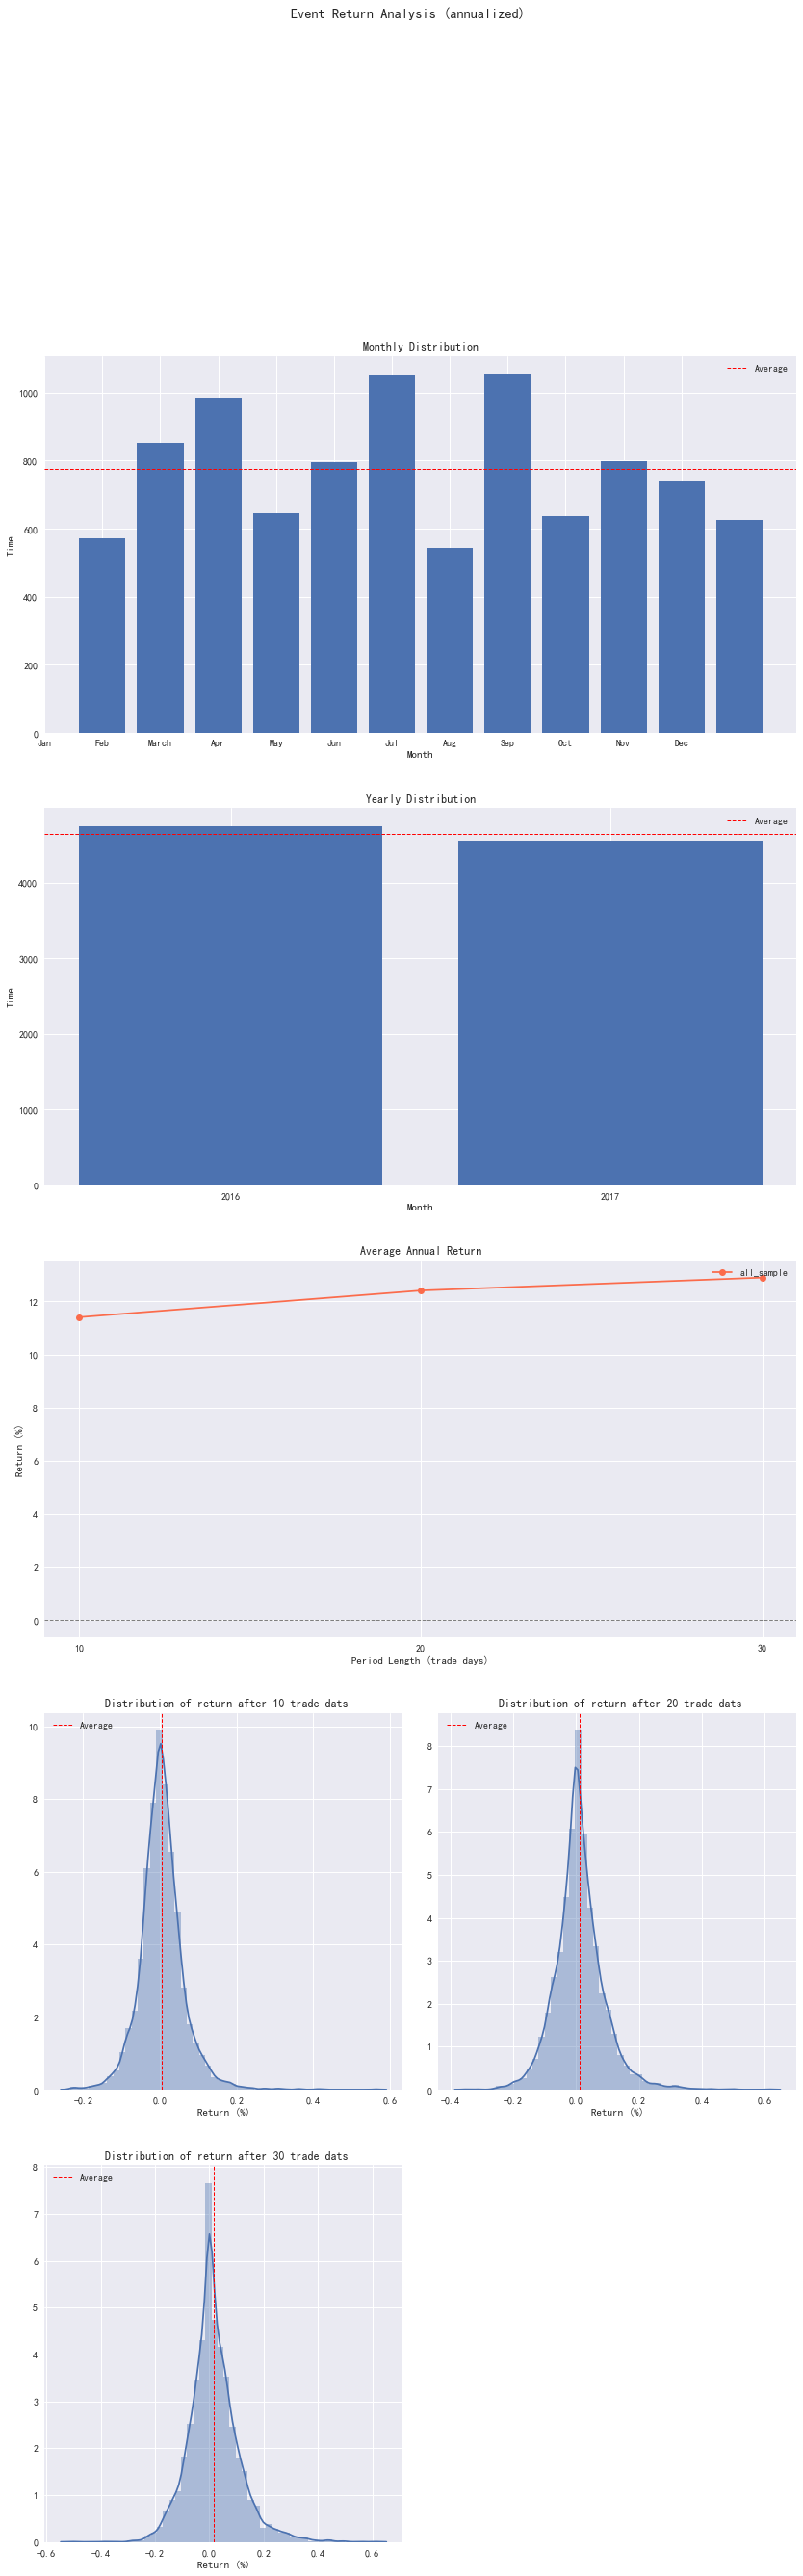

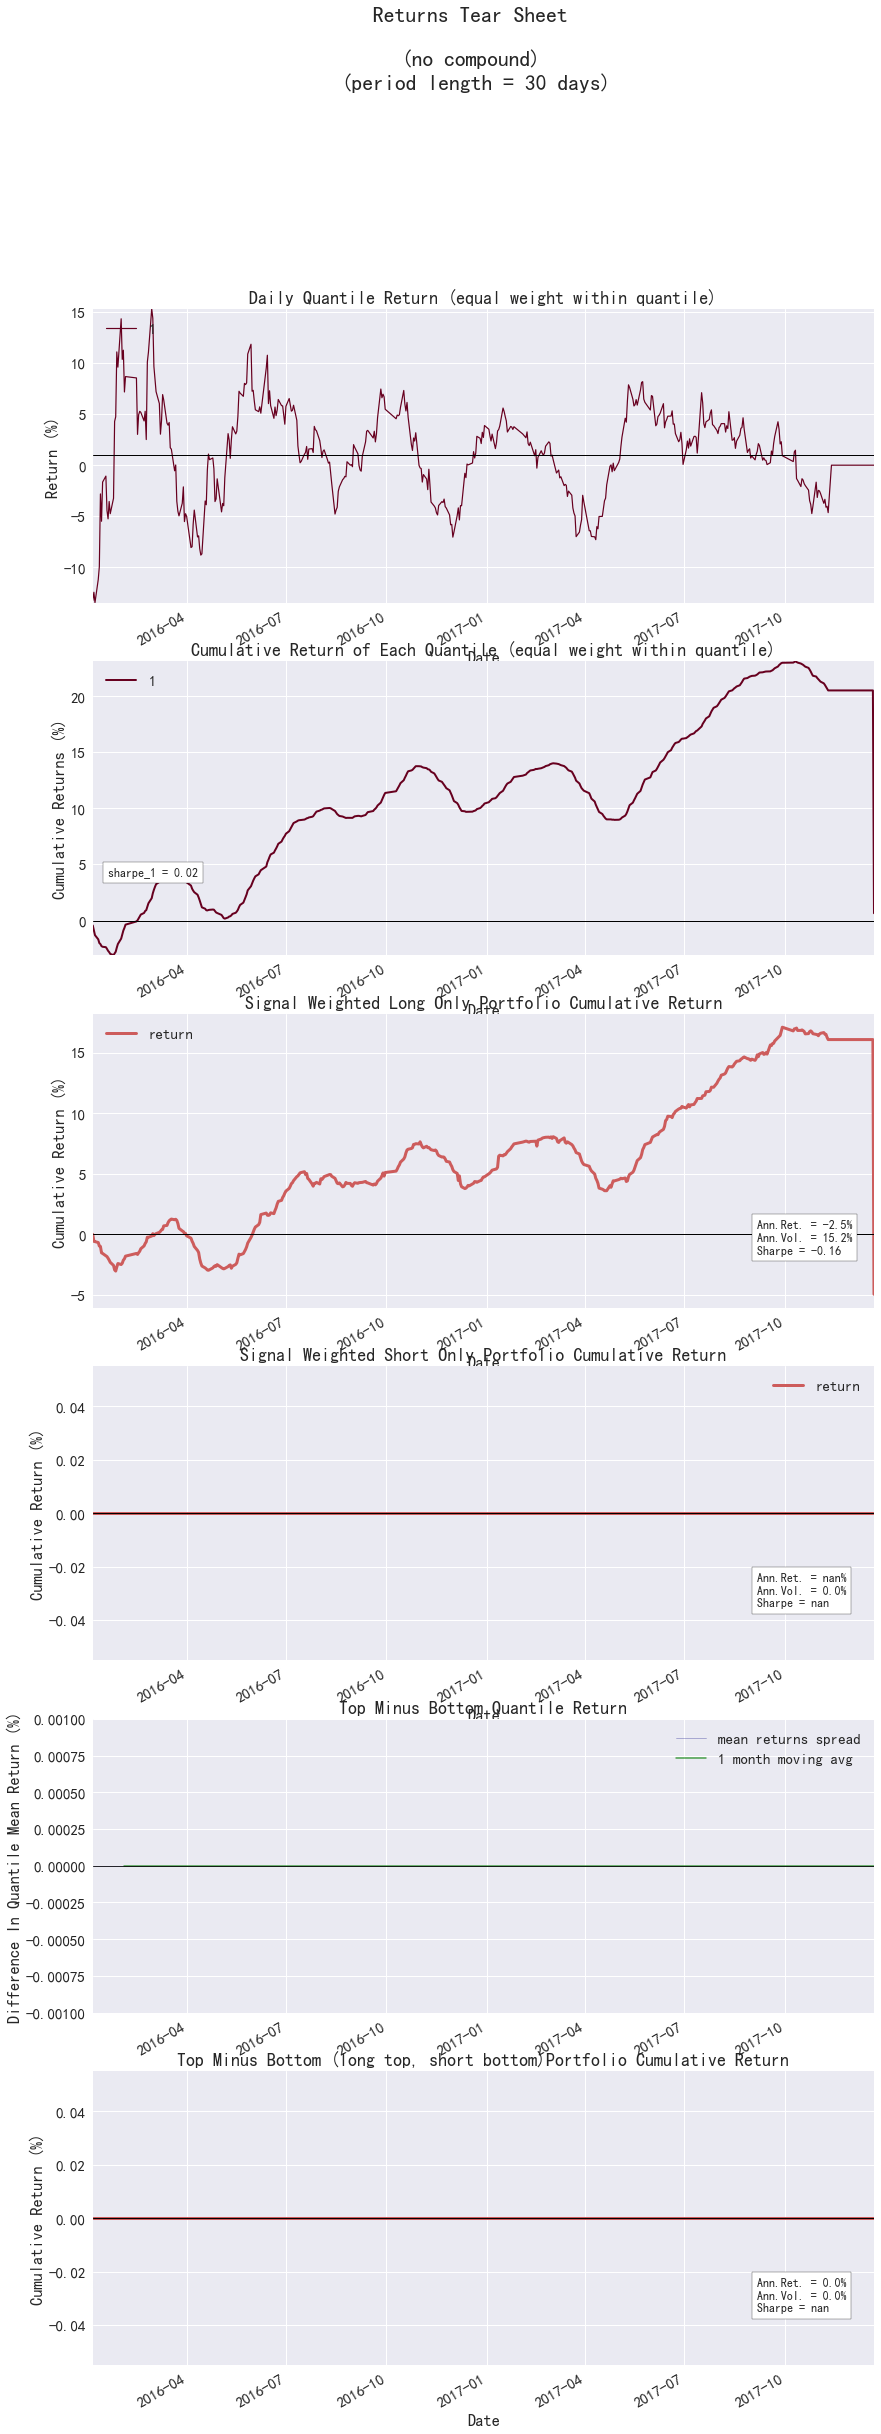

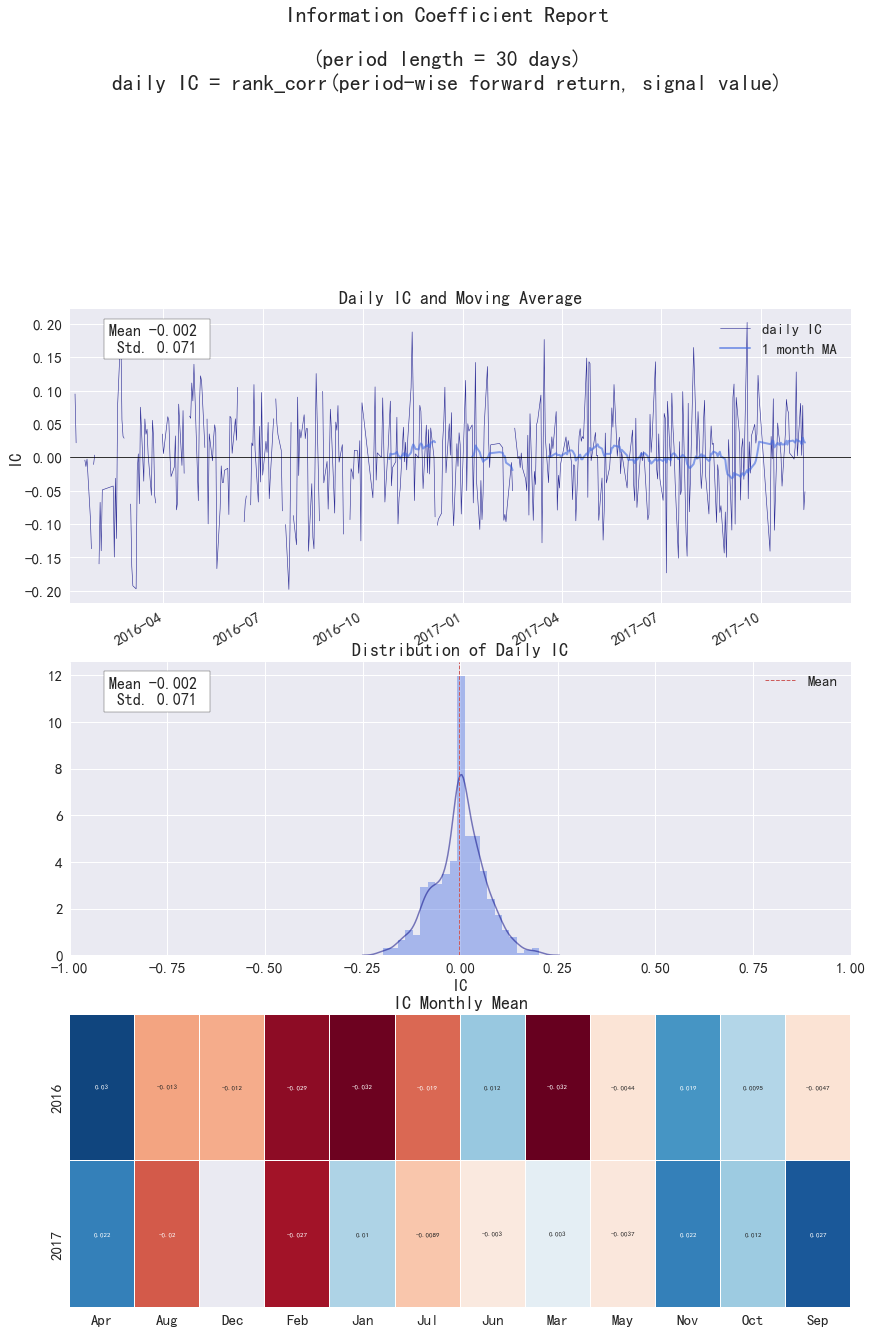

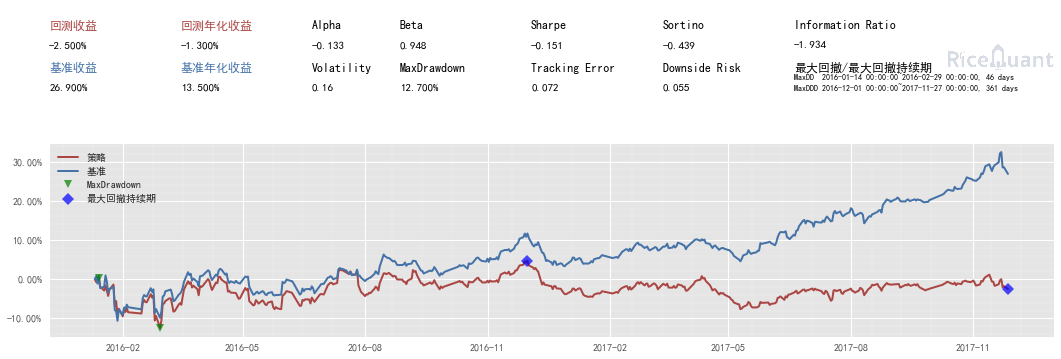

[2018-01-06 10:09:47.038457] DEBUG: basic_system_log: mod tear_down [END]   sys_analyser
[2018-01-06 10:09:47.043460] DEBUG: basic_system_log: mod tear_down [START] sys_risk
[2018-01-06 10:09:47.049460] DEBUG: basic_system_log: mod tear_down [END]   sys_risk
[2018-01-06 10:09:47.053461] DEBUG: basic_system_log: mod tear_down [START] sys_progress
[2018-01-06 10:09:47.058463] DEBUG: basic_system_log: mod tear_down [END]   sys_progress
[2018-01-06 10:09:47.062464] DEBUG: basic_system_log: mod tear_down [START] sys_simulation
[2018-01-06 10:09:47.066465] DEBUG: basic_system_log: mod tear_down [END]   sys_simulation
[2018-01-06 10:09:47.070466] DEBUG: basic_system_log: mod tear_down [START] sys_accounts
[2018-01-06 10:09:47.072466] DEBUG: basic_system_log: mod tear_down [END]   sys_accounts
[2018-01-06 10:09:47.075466] DEBUG: system_log: 策略运行成功，正常退出


{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2016-01-11  1246.6    9998753.40                  1.000  10000000.00   
  2016-01-12  1246.6   10071603.72                  1.000  10072850.32   
  2016-01-13  1246.6    9884216.16                  1.007   9885462.76   
  2016-01-14  1246.6   10089957.24                  0.989  10091203.84   
  2016-01-15  1246.6    9767862.36                  1.009   9769108.96   
  2016-01-18  1246.6    9805446.36                  0.977   9806692.96   
  2016-01-19  1246.6   10094843.16                  0.981  10096089.76   
  2016-01-20  1246.6    9942158.16                  1.010   9943404.76   
  2016-01-21  1246.6    9650788.20                  0.994   9652034.80   
  2016-01-22  1246.6    9751356.72                  0.965   9752603.32   
  2016-01-25  1246.6    9799683.48                  0.975   9800930.08   

In [16]:
import numpy as np
import talib as ta
import pandas as pd
import rqalpha
from rqalpha.api import *

#读取文件位置
def init(context):
    context.codes = pool
    context.stocks = None
    scheduler.run_daily(find_pool)
    

def find_pool(context, bar_dict):
    try:
        codes = context.codes.loc[context.now].dropna()
        context.stocks = codes
    except:
        context.stocks = None

def handle_bar(context, bar_dict):
    buy(context, bar_dict)


def buy(context, bar_dict):
    pool = context.stocks
    if pool is not None:
        for ins, percentage in pool.items():
            order_target_percent(ins, percentage)
        for ins in context.portfolio.positions:
            if ins not in context.stocks:
                order_target_percent(ins, 0)

config = {
  "base": {
    "start_date": "2016-01-10",
    "end_date": "2017-12-22",
    "accounts": {'stock':10000000},
    "benchmark": "000300.XSHG"
  },
  "extra": {
    "log_level": "verbose",
  },
    
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "report_save_path": ".",
      "plot": True
    }
  },
  "sys_simulation": {
        "enabled": True,
        #设置手续费的倍数，默认是10
        "commission_multiplier": 0,
        #设置滑点
        "slippage": 0
  }
}

rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)

In [17]:
from fxdayu_betaman.loader import FileLoader
from fxdayu_betaman.calculator import BaseCalculator

df = FileLoader("strategy/trades.csv").load()
df2 = df.copy()
df2[["commission","tax","transaction_cost"]] = 0
a = BaseCalculator(df,10000000)
b = BaseCalculator(df2,10000000)
cum_ret_with_commission = a.daily_net-1
cum_ret_without_commission = b.daily_net-1

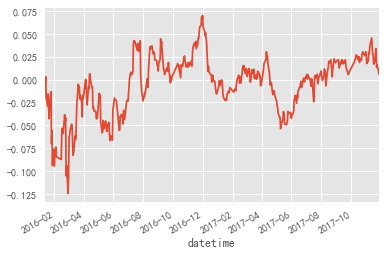

In [18]:
%matplotlib inline
cum_ret_with_commission.plot()

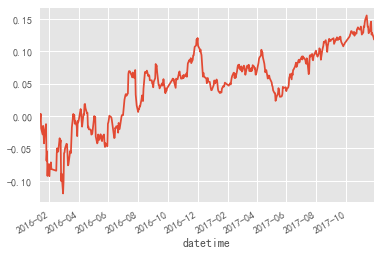

In [19]:
cum_ret_without_commission.plot()